# Data Pre-process for Super Resolution

In [1]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import pyramid_reduce 
plt.style.use('dark_background')

# Define path & Load dataset

In [2]:
BASE_PATH = "D:\\00_MLDL\\00_BreadBrother\\02_Super_Resolution\\"
IMG_BASE_PATH = os.path.join(BASE_PATH, 'img_align_celeba')
TARGET_IMG_PATH = os.path.join(BASE_PATH, 'processed_img') # Create folder manually

# Load dataset
# Separate TRAIN / VALIDATION / TEST by labeling
eval_list = np.loadtxt(os.path.join(BASE_PATH, 'list_eval_partition.csv'), dtype=str, delimiter=',', skiprows=1)
eval_list[0][0]

'000001.jpg'

- Pre-process example image 

(218, 178, 3) (178, 178, 3) (45, 45, 3) (177, 177, 3)


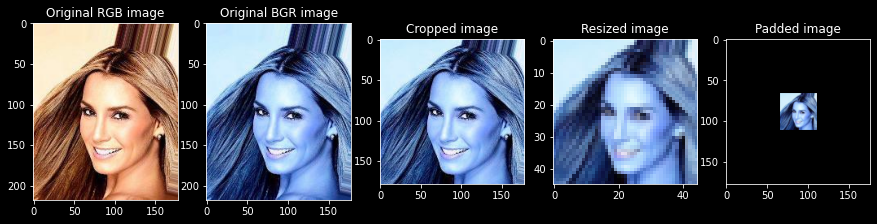

In [3]:
img_sample = cv2.imread(os.path.join(IMG_BASE_PATH, eval_list[0][0]))
rgb_img_sample = cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGB)
h, w, _ = img_sample.shape

# Crop image to square size
crop_sample = img_sample[int((h-w)/2):int(-(h-w)/2), :] # [20:-20, :]

# Resize image
resized_sample = pyramid_reduce(crop_sample, downscale=4, multichannel=True) # 4 times downscale, multichannel = True

# padding
pad = int((crop_sample.shape[0] - resized_sample.shape[0]) / 2) # 178-45 = 133 / 2 = 66.5 = 66
padded_sample = cv2.copyMakeBorder(resized_sample, top=pad, bottom=pad, left=pad, right=pad,                borderType=cv2.BORDER_CONSTANT, value=(0,0,0))

print(img_sample.shape, crop_sample.shape, resized_sample.shape, padded_sample.shape)

plt.figure(figsize=(15, 20))

plt.subplot(1,5,1)
plt.title("Original RGB image")
plt.imshow(rgb_img_sample)

plt.subplot(1,5,2)
plt.title("Original BGR image")
plt.imshow(img_sample)

plt.subplot(1,5,3)
plt.title("Cropped image")
plt.imshow(crop_sample)

plt.subplot(1,5,4)
plt.title("Resized image")
plt.imshow(resized_sample)

plt.subplot(1,5,5)
plt.title("Padded image")
plt.imshow(padded_sample)

plt.show()



# Pre-process
![](markdown_image/data_split_txt.png)

In [4]:
import time

downscale = 4
n_train = int(162770 - 1 + 1) # 162770
n_val = int(182637 - 162771 + 1) # 19867
n_test = int(202599 - 182638 + 1) # 19962

t_init = time.time()

for idx, e in enumerate(eval_list):
    filename, postfix = os.path.splitext(e[0])
    
    img_path = os.path.join(IMG_BASE_PATH, e[0])
    img = cv2.imread(img_path)
    h, w, _ = img.shape

    crop_img = img[int((h-w)/2):int(-(h-w)/2), :]
    crop_img = cv2.resize(crop_img, dsize = (176, 176))
    resized_img = pyramid_reduce(crop_img, downscale = downscale, multichannel=True) # 44 x 44 size

    norm = cv2.normalize(crop_img.astype(np.float64), None, 0, 1, cv2.NORM_MINMAX) # Ground-truth image

    # Create folder manually
    
    if int(e[1]) == 0:
        np.save(os.path.join(TARGET_IMG_PATH, "x_train", filename + ".npy"), resized_img)
        np.save(os.path.join(TARGET_IMG_PATH, "y_train", filename + ".npy"), norm)
    
    elif int(e[1]) == 1:
        np.save(os.path.join(TARGET_IMG_PATH, "x_val", filename + ".npy"), resized_img)
        np.save(os.path.join(TARGET_IMG_PATH, "y_val", filename + ".npy"), norm)
    
    elif int(e[1]) == 2:
        np.save(os.path.join(TARGET_IMG_PATH, "x_test", filename + ".npy"), resized_img)
        np.save(os.path.join(TARGET_IMG_PATH, "y_test", filename + ".npy"), norm)
    
    print(f"{idx}...")

t_fin = time.time()
print(f"Pre-process time : {t_init - t_fin:.3f} secs")
print(f"Pre-process done")
    

7604...
197605...
197606...
197607...
197608...
197609...
197610...
197611...
197612...
197613...
197614...
197615...
197616...
197617...
197618...
197619...
197620...
197621...
197622...
197623...
197624...
197625...
197626...
197627...
197628...
197629...
197630...
197631...
197632...
197633...
197634...
197635...
197636...
197637...
197638...
197639...
197640...
197641...
197642...
197643...
197644...
197645...
197646...
197647...
197648...
197649...
197650...
197651...
197652...
197653...
197654...
197655...
197656...
197657...
197658...
197659...
197660...
197661...
197662...
197663...
197664...
197665...
197666...
197667...
197668...
197669...
197670...
197671...
197672...
197673...
197674...
197675...
197676...
197677...
197678...
197679...
197680...
197681...
197682...
197683...
197684...
197685...
197686...
197687...
197688...
197689...
197690...
197691...
197692...
197693...
197694...
197695...
197696...
197697...
197698...
197699...
197700...
197701...
197702...
197703...
19